In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/hieut/BenTen_Tech/fer20131.csv"
df = pd.read_csv(path)
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [3]:
df.shape

(35887, 3)

In [4]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [5]:
df.emotion.value_counts() # Will get top 3 most count emotions to do face classificaltions. 3,6,4

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [6]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [7]:
emotion_dict = {0:"Angry", 1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

In [8]:
# We will get 3 emotions with the highest count: Happy, Sad, And Neutral
Happy = df[df["emotion"] == 3 ]
Sad = df[df["emotion"] == 4 ]
Neutral = df[df["emotion"] == 6]

frames = [Happy,Sad,Neutral]
final_df = pd.concat(frames)
final_df = final_df.reset_index()

In [9]:
final_df = final_df.drop(['index'], axis=1)
final_df

,emotion,pixels,Usage
0,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
1,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
2,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
3,3,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training
4,3,252 250 246 229 182 140 98 72 53 44 67 95 95 8...,Training
...,...,...,...
21259,6,87 82 59 61 72 102 143 130 90 95 143 173 146 1...,PrivateTest
21260,6,112 102 98 89 98 133 164 185 180 179 185 169 1...,PrivateTest
21261,6,29 29 27 31 49 56 29 19 22 20 34 43 55 71 85 9...,PrivateTest
21262,6,139 143 145 154 159 168 176 181 190 191 195 19...,PrivateTest


In [10]:
emotion_list = list() #adding label for visualization
for i in range(len(final_df)):
    emotion_list.append(emotion_dict[final_df["emotion"][i]])
final_df["label"] = emotion_list
final_df

,emotion,pixels,Usage,label
0,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,Happy
1,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,Happy
2,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training,Happy
3,3,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training,Happy
4,3,252 250 246 229 182 140 98 72 53 44 67 95 95 8...,Training,Happy
...,...,...,...,...
21259,6,87 82 59 61 72 102 143 130 90 95 143 173 146 1...,PrivateTest,Neutral
21260,6,112 102 98 89 98 133 164 185 180 179 185 169 1...,PrivateTest,Neutral
21261,6,29 29 27 31 49 56 29 19 22 20 34 43 55 71 85 9...,PrivateTest,Neutral
21262,6,139 143 145 154 159 168 176 181 190 191 195 19...,PrivateTest,Neutral


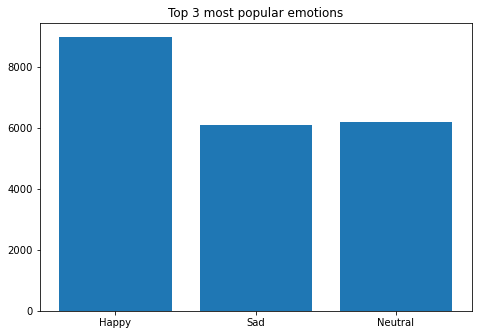

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
emotions = [emotion for emotion in final_df['label'].unique()]
size = [len(Happy),len(Sad),len(Neutral)]
ax.bar(emotions,size)
ax.set_title("Top 3 most popular emotions")
plt.show()

In [12]:
training_size = len(final_df[final_df["Usage"] == "Training"])
validating_size = len(final_df[final_df["Usage"] == "PrivateTest"])
test_size = len(final_df[final_df["Usage"] == "PublicTest"])


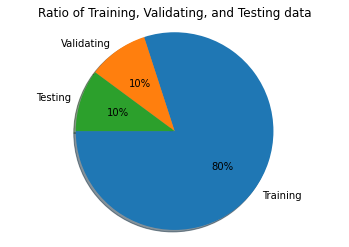

In [13]:
labels = ["Training", "Validating", "Testing"]
sizes = [training_size, validating_size, test_size]
explode = (0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Ratio of Training, Validating, and Testing data")
plt.show()

## Reshaping image for visualization

In [14]:
def showing_image(dataset, emotion):
    fig = plt.figure(figsize=(10, 15))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):    
        img = np.array(dataset["pixels"].iloc[i].split(" ")).reshape(48,48).astype("float")
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap = "gray")
        plt.title(emotion)
    plt.show()

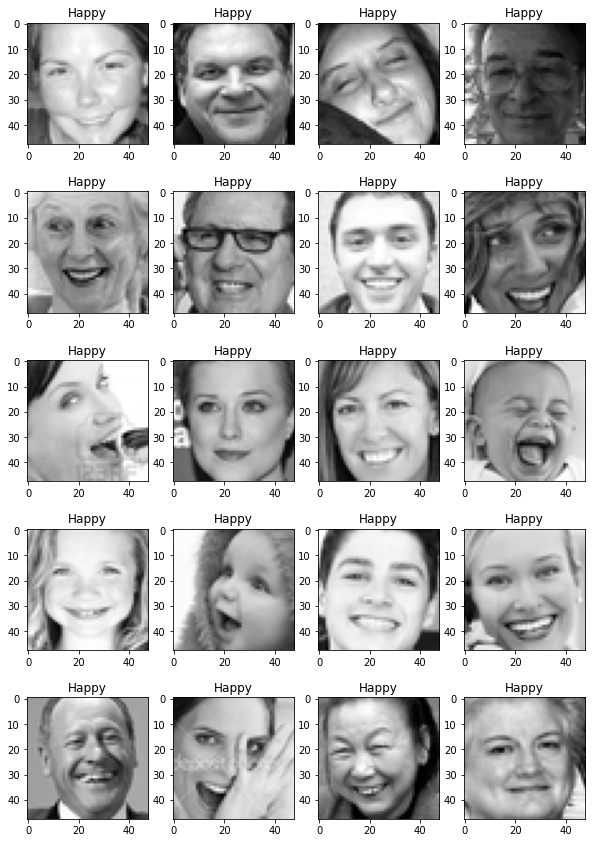

In [15]:
showing_image(Happy,"Happy")

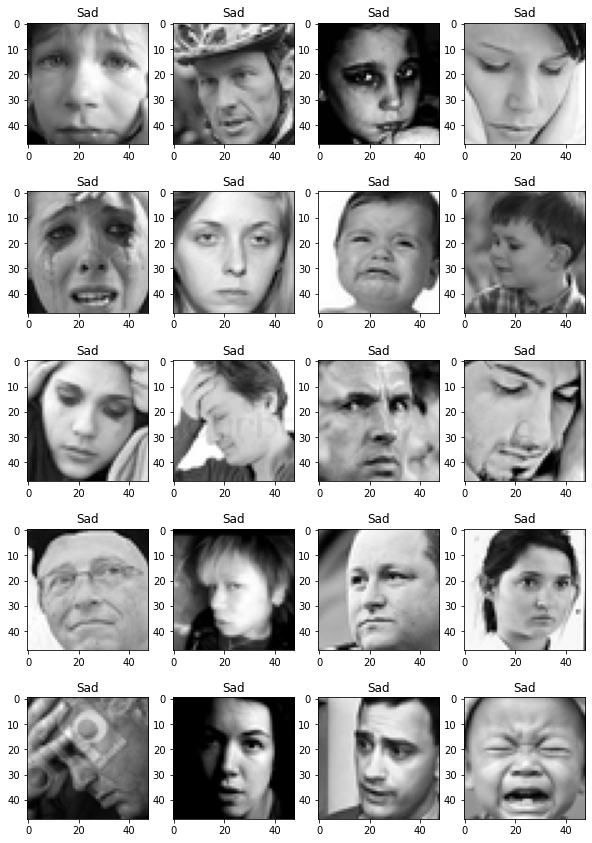

In [16]:
showing_image(Sad,"Sad")

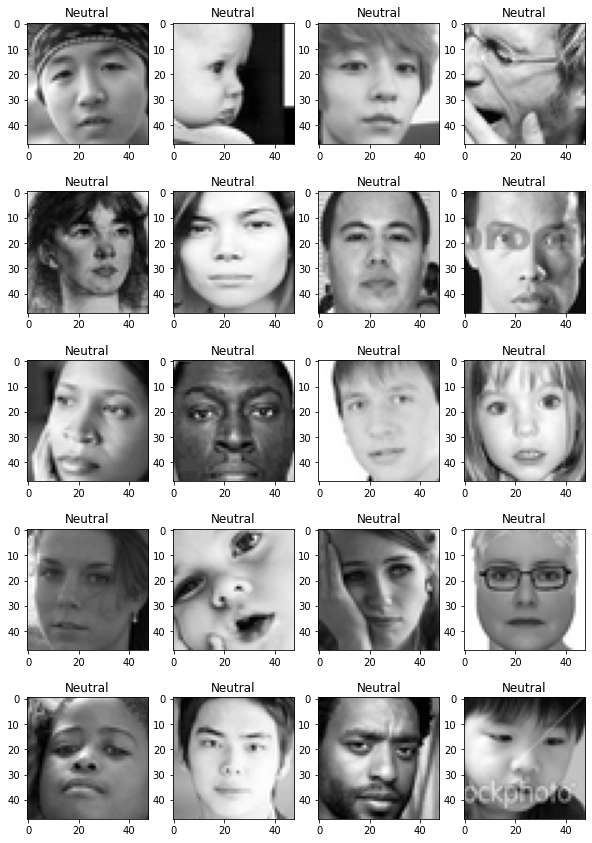

In [17]:
showing_image(Neutral,"Neutral")

# Exporting to csv

In [41]:
final_df.to_csv('new_Fer2013.csv', index=False)

In [45]:
df.loc[df.emotion == 3, 'emotion'] = 0
df.loc[df.emotion == 4, 'emotion'] = 1
df.loc[df.emotion == 6, 'emotion'] = 2

In [44]:
final_df.to_csv('new_Fer2013.csv', index=False)